In [2]:
import pandas as pd

df = pd.read_csv("/Users/ayyaz/GufhtuguDataSet/GP Orders - 4.csv")
#df = pd.read_csv("/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv")
df

,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi
...,...,...,...,...,...
19182,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi
19183,310,Returned,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi
19184,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad
19185,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi


In [3]:
len(df["City (Billing)"].unique())

4083

In [4]:
df["City (Billing)"] = df["City (Billing)"].str.lower()
df["City (Billing)"] = df["City (Billing)"].str.strip()
len(df["City (Billing)"].unique())

3518

In [9]:
cities = set()
files_path = "/Users/ayyaz/GufhtuguDataSet/"

In [10]:
pk_cities = pd.read_csv(files_path + "pk.csv")
cities.update(pk_cities['city'].str.lower())
len(cities)

145

In [11]:
pk_cities = pd.read_csv(files_path + "cities.csv")
pk_cities.columns = ["city","Type","District"]
cities.update(pk_cities["city"].str.lower().tolist())
len(cities)

1006

In [12]:
pk_cities = pd.read_csv(files_path + "Pakistan_Population_2017_Census_Village_Administration_Level.csv")
cities.update(pk_cities["Village"].str.lower().tolist())
len(cities)

44936

In [261]:
def get_proper_city_name(_city):
    if str(_city) in cities:
        return _city
    for part in str(_city).split():
        if str(part) in cities:
            return part
    return "NO CHANGE" 

In [264]:
df['city'] = df['City (Billing)'].apply(get_proper_city_name)

<ipython-input-264-b79fa41e2926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['City (Billing)'].apply(get_proper_city_name)


In [263]:
get_proper_city_name('nankana sahib')

'nankana sahib'

In [265]:
len(df["city"].unique())

739

In [266]:
no_change = df[df["city"] == "NO CHANGE"]
len(no_change)

1815

In [17]:
no_change_map = dict()
for index, row in no_change.iterrows():
    val = no_change_map.get(row['City (Billing)'])
    if( val == None ):
        no_change_map[row['City (Billing)']] = 1
    else:
        no_change_map[row['City (Billing)']] = val + 1
    


In [18]:
count = 1
for k in no_change_map.keys():
    if(no_change_map[k] >= 6  and '??' not in k):
        print(str(count) , "\t" , no_change_map[k],"\t", k)
        count+=1

1 	 13 	 fateh jang
2 	 11 	 london
3 	 13 	 chakdara
4 	 13 	 rawalakot
5 	 11 	 pakistan
6 	 6 	 sanawan
7 	 7 	 upper dir
8 	 24 	 talagang
9 	 7 	 liaquatpur
10 	 7 	 alkhidmat raazi hospital cbr town
11 	 14 	 haroonabad
12 	 9 	 shahdadkot
13 	 7 	 shabqadar
14 	 47 	 buner
15 	 17 	 battagram
16 	 19 	 town
17 	 32 	 taxila
18 	 51 	 mirpurkhas
19 	 40 	 city
20 	 7 	 faislabad
21 	 18 	 skardu
22 	 8 	 dina
23 	 7 	 bajaur
24 	 9 	 murree
25 	 12 	 wahcantt
26 	 9 	 besham
27 	 12 	 hub
28 	 7 	 d.i.khan
29 	 14 	 shahkot
30 	 27 	 depalpur
31 	 27 	 mingora
32 	 10 	 hazro
33 	 10 	 fort abbas
34 	 9 	 bahawal pur
35 	 7 	 dunyapur
36 	 19 	 daharki
37 	 9 	 balochistan
38 	 16 	 ahmed pur east
39 	 6 	 fsd
40 	 7 	 latamber
41 	 12 	 usta muhammad
42 	 24 	 bhimber
43 	 6 	 taunsa
44 	 6 	 rawlakot
45 	 15 	 timergara
46 	 9 	 lhr
47 	 10 	 rwp
48 	 8 	 pindigheb
49 	 15 	 nankana sahib
50 	 15 	 kashmore
51 	 18 	 peshawer
52 	 7 	 piplan
53 	 12 	 pirmahal
54 	 6 	 dubai
55

In [19]:
missing_cities = ['fateh jang','chakdara','rawalakot','talagang','haroonabad','buner','battagram','taxila','shahkot','depalpur','skardu',
                 'mingora','hazro','fort abbas','daharki','usta muhammad','bhimber','timergara','nankana sahib','kashmore','tando adam','dina',
                 'pindigheb','sakrand','shahdadkot','murree','besham','poonch']
other_counteries = ['abu dhabi','london','dubai']
replace_name = {'mirpurkhas': 'mirpur khas', 'wahcantt':'wah cantt' , 'fsd':'faisalabad',
                'ahmed pur east':'ahmedpur east', 'rwp':'rawalpindi','lhr':'lahore','bahawal pur':'bahawalpur', 'rawlakot':'rawalakot',
               'khi':'karachi','peshawer':'peshawar','pirmahal':'pir mahal','sadiqbad':'sadiqabad','faislabad':'faisalabad' }

In [20]:
cities.update(missing_cities)

In [21]:
for old_value in replace_name.keys():
    df['City (Billing)'] = df['City (Billing)'].replace([old_value],replace_name[old_value])

In [22]:
df['city'] = df['City (Billing)'].apply(get_proper_city_name)

In [23]:
no_change = df[df["city"] == "NO CHANGE"]
len(no_change)

1907

In [24]:
len(df["city"].unique())

649

In [54]:
_map = dict()
for index, row in df.iterrows():
    val = _map.get(row['city'])
    if( val == None ):
        _map[row['city']] = 1
    else:
        _map[row['city']] = val + 1
_map

{'swat': 46,
 'karachi': 2911,
 'wah': 103,
 'bahawalpur': 204,
 'lahore': 2299,
 'matli': 12,
 'toba': 64,
 'mandi': 91,
 'mirpur': 151,
 'hafizabad': 51,
 'peshawar': 551,
 'faisalabad': 569,
 'abbottabad': 109,
 'mansehra': 68,
 'NO CHANGE': 1907,
 'islamabad': 989,
 'multan': 481,
 'bhimber': 37,
 'adda': 4,
 'sialkot': 279,
 'nowshera': 52,
 'jauharabad': 15,
 'chitral': 26,
 'rawalpindi': 767,
 'mianwali': 77,
 'kotli': 41,
 'wahdat': 11,
 'sukho': 3,
 'gujranwala': 314,
 'kahna': 2,
 'minchinabad': 4,
 'bhakkar': 47,
 'haripur': 112,
 'shah': 19,
 'khan': 254,
 'mardan': 100,
 'bahawalnagar': 39,
 'sial': 3,
 'kallar': 6,
 'arifwala': 31,
 'madina': 7,
 'muzaffarabad': 39,
 'okara': 110,
 'larkana': 52,
 'daska': 44,
 'hyderabad': 284,
 'ali': 23,
 'jaranwala': 44,
 'taluka': 3,
 'kandiaro': 7,
 'raiwand': 3,
 'khairpur': 29,
 'swabi': 88,
 'matta': 12,
 'pattoki': 17,
 'gilgit': 42,
 'kahuta': 11,
 'fazal': 2,
 'kotri': 14,
 'sadiq': 29,
 'chakdara': 18,
 'chakwal': 99,
 'rawal

In [59]:
df['city'].value_counts()

karachi       2911
lahore        2299
NO CHANGE     1907
islamabad      989
rawalpindi     767
              ... 
makhai           1
gakkhar          1
pindorian        1
badar            1
changa           1
Name: city, Length: 649, dtype: int64

In [52]:
final_map = dict()        
for k,v in _map.items(): 
    if ( v > 75 and k != 'NO CHANGE' ):
        final_map[k+"\n"+str(v)] = v

In [ ]:
data = {'city':  _map.keys(),
        'count': _map.values()
        }

new = pd.DataFrame (data, columns = ['city','count'])

new.to_csv('/Users/ayyaz/GufhtuguDataSet/cities_counts.csv')

In [ ]:
import matplotlib.pyplot as plt 
  
plt.figure(figsize=(25, 10))

x = final_map.keys()
y = final_map.values()
  
plt.plot(x, y); 
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
  
plt.title('Orders by City') 
plt.show() 
#https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/interactive-maps/

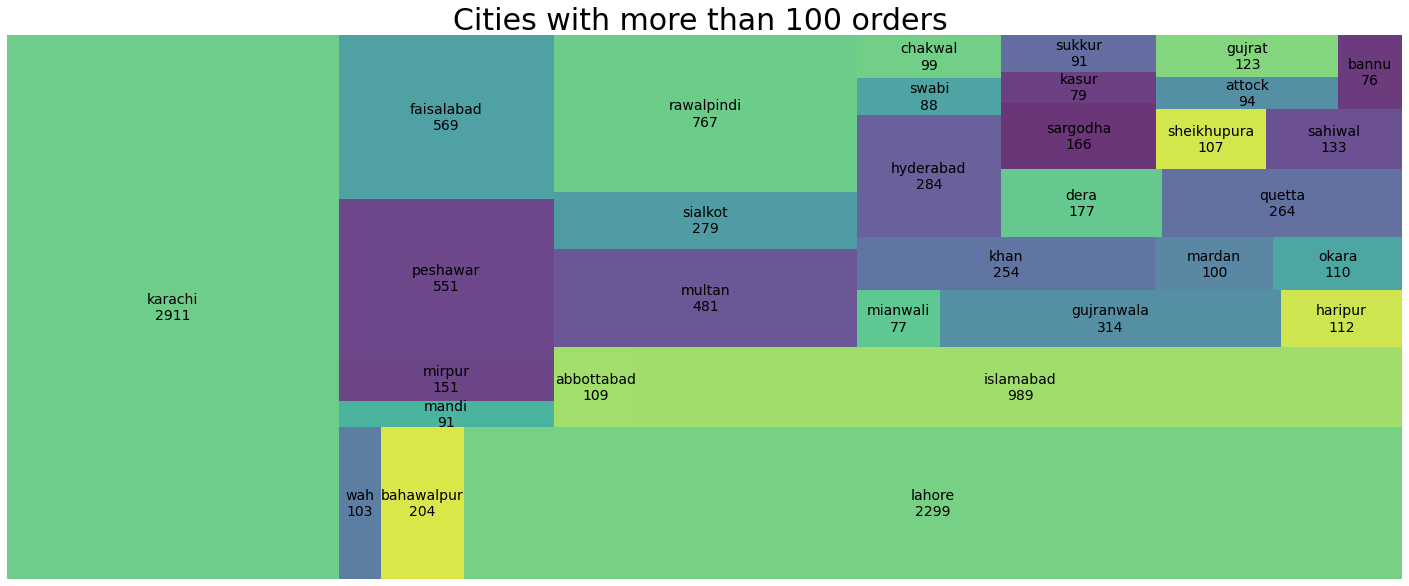

In [53]:
import squarify
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 10))
# Tree Map
squarify.plot(sizes = final_map.values(), alpha = 0.8,
              label = final_map.keys(), text_kwargs={'fontsize':14})

plt.title('Cities with more than 75 orders ', fontsize = 30)
plt.axis('off')
plt.show()

In [384]:
get_proper_city_name


انٹرنیٹ سے پیسہ کمائیں                                                                                                         2574
Python Programming                                                                                                             1537
Blockchain, Cryptocurrency And Bitcoin                                                                                         1064
Product Management                                                                                                             1041
Artificial Intelligence                                                                                                         899
                                                                                                                               ... 
Justju ka safar-1/Hazir Ghayab/Mr Human                                                                                           1
365 Aqwal e Khud Shinasi By Qasim Ali Shah/Shaoor شعور۔ علم سے آگہی کا سفر  

In [91]:
books = dict()
for row in df.itertuples():
    for book in str(row[3]).replace(',','/').split('/'):
        val = books.get(book)
        if(val == None):
            books[book] = 1
        else:
            books[book] = val +1

In [123]:
books = {k: v for k, v in sorted(books.items(),reverse=True, key=lambda item: item[1])} 
books = {k: v for k, v in books.items() if v > 300} 
books

{'انٹرنیٹ سے پیسہ کمائیں': 3497,
 'Python Programming': 2397,
 'Artificial Intelligence': 2093,
 'Blockchain': 1889,
 ' Cryptocurrency And Bitcoin': 1889,
 'Product Management': 1553,
 'Justju ka safar-1': 1488,
 'ڈیٹا سائنس': 960,
 'مشین لرننگ': 836,
 'Sukkur To Florida': 685,
 '(C++)': 655,
 'R ka Taaruf': 620,
 'Introduction to Blockchain with Case Studies': 592,
 'Molo Masali': 588,
 'ڈیٹا سائنس ۔ ایک تعارف': 570,
 'Lucky Draw - Free Book': 537,
 'Kaggle for Begginers': 492,
 'ایک تھا الگورتھم': 476,
 'Column Nigari Kese Sekhain': 463,
 'Linux - An Introduction': 458,
 'Muslim Youth Science and Islam': 407,
 'Waqfa e Pareshani': 397,
 'Python Programming- Release Date: August 14': 396,
 ' 2020': 396,
 'Book Band kamron ki Muhabbat': 335,
 'Data Science': 323}

/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0,

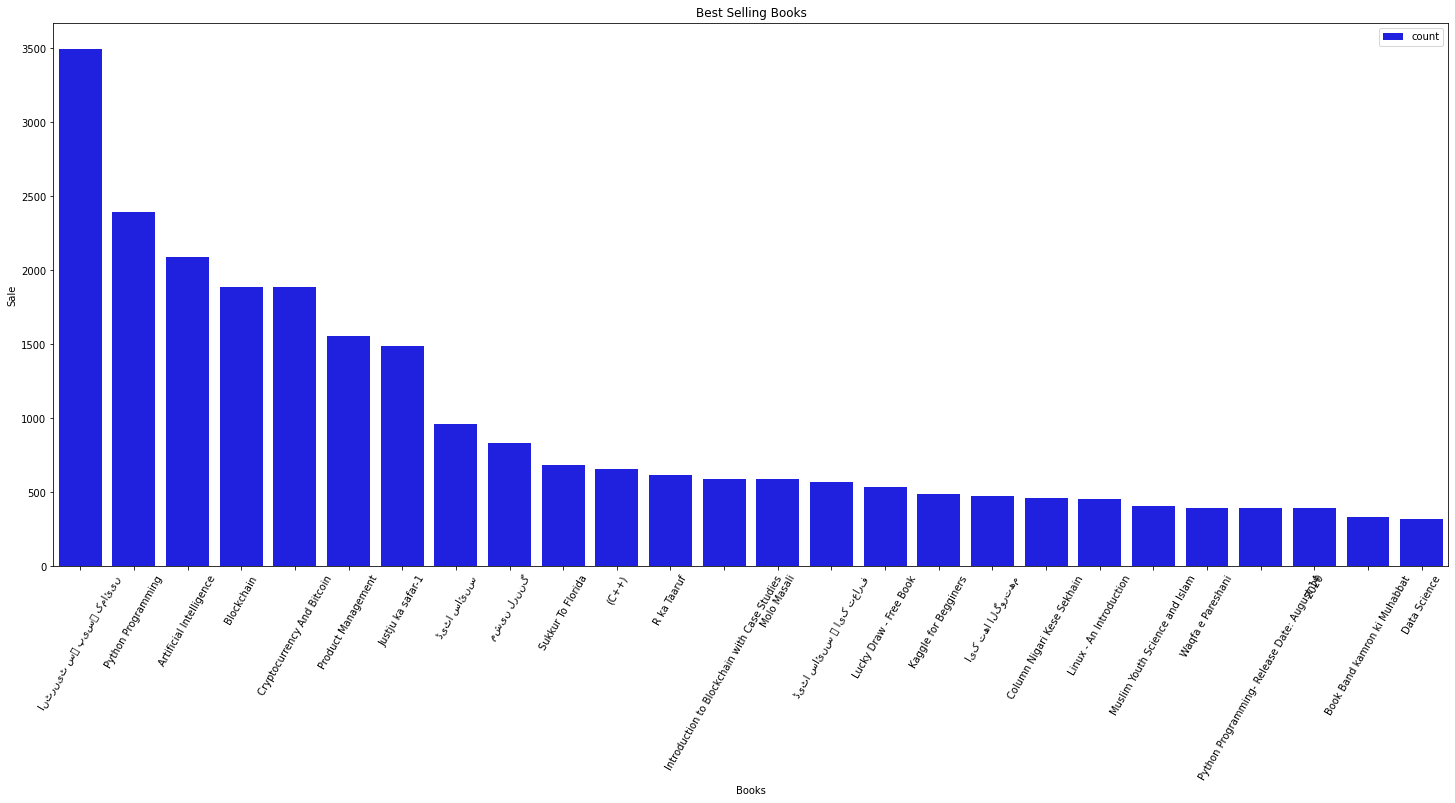

In [126]:
import seaborn as sns
plt.figure(figsize = (25, 10))

sns.barplot(x = [k for k, v in books.items()] , y = [v for k, v in books.items()], color = "Blue", label = "count")


plt.xlabel("Books")
plt.ylabel("Sale")
plt.title("Best Selling Books")
plt.xticks(rotation = 60)
plt.legend()
plt.show()

In [135]:
row_has_NaN = df.isnull().any(axis=1)
df[row_has_NaN]

,Order Number,Order Status,Book Name,Order Date,City (Billing),city
2206,67823,Returned,NaN,1/2/2021 20:31,karachi,karachi
3919,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",12/17/2020 7:18,NaN,NO CHANGE
6835,60457,Returned,NaN,11/14/2020 0:00,dera ismail khan,dera


In [139]:
df = df.dropna()

In [141]:
df

,Order Number,Order Status,Book Name,Order Date,City (Billing),city
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,swat,swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,karachi,karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,karachi,karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,karachi,karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,karachi,karachi
...,...,...,...,...,...,...
19182,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,karachi,karachi
19183,310,Returned,Kaggle for Begginers,10/3/2019 16:42,rawalpindi,rawalpindi
19184,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,hyderabad,hyderabad
19185,308,Completed,Kaggle for Begginers,10/3/2019 15:54,rawalpindi,rawalpindi


In [148]:
df.dtypes
print (df['Order Date'].dtypes)

object


In [149]:
df['Order Date']= pd.to_datetime(df['Order Date'])

<ipython-input-149-5013ac844c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']= pd.to_datetime(df['Order Date'])


In [151]:
df.dtypes

Order Number               int64
Order Status              object
Book Name                 object
Order Date        datetime64[ns]
City (Billing)            object
city                      object
dtype: object

In [402]:
dd = {"2019-10":0,"2019-11":0,"2019-12":0,"2020-1":0,"2020-2":0,"2020-3":0,"2020-4":0,"2020-5":0,"2020-6":0,"2020-7":0,"2020-8":0,"2020-9":0,"2020-10":0,"2020-11":0,"2020-12":0,"2021-1":0}

for name, group in df['Order Date'].groupby([pd.DatetimeIndex(df['Order Date']).year,pd.DatetimeIndex(df['Order Date']).month]):
    dd[str(name).replace(', ','-').replace('(','').replace(')','')] = len(group)

print(dd)

{'2019-10': 9, '2019-11': 29, '2019-12': 414, '2020-1': 734, '2020-2': 59, '2020-3': 82, '2020-4': 152, '2020-5': 1490, '2020-6': 1121, '2020-7': 1305, '2020-8': 2445, '2020-9': 1541, '2020-10': 2082, '2020-11': 2708, '2020-12': 2391, '2021-1': 2622}


16 	 16


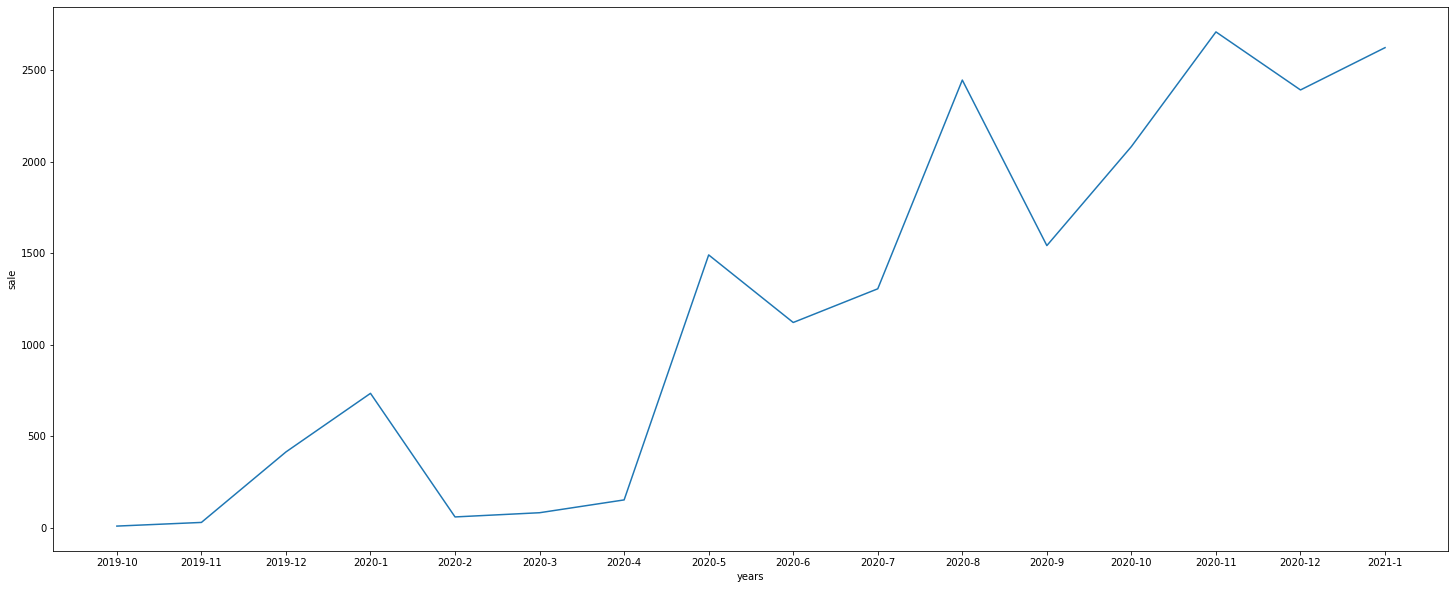

,years,sale
0,2019-10,9
1,2019-11,29
2,2019-12,414
3,2020-1,734
4,2020-2,59
5,2020-3,82
6,2020-4,152
7,2020-5,1490
8,2020-6,1121
9,2020-7,1305


In [407]:

print(len(dd.keys()), "\t",len(dd.values()))
plt.figure(figsize = (25, 10))
#plt.plot(x, y)
d = {'years': dd.keys(), 'sale' : dd.values()}

sns.lineplot(data=pd.DataFrame(data=d), x="years", y="sale")
plt.show()
data

In [238]:
returnedDF = df[df['Order Status']=='Returned']
returnedDF

,Order Number,Order Status,Book Name,Order Date,City (Billing),city
20,70934,Returned,انٹرنیٹ سے پیسہ کمائیں,2021-01-19 13:21:00,karachi,karachi
21,70933,Returned,Artificial Intelligence/Python Programming/Blo...,2021-01-19 12:38:00,gagoo mandi tehsil burewala district vehari,mandi
29,70920,Returned,مشین لرننگ/ایک تھا الگورتھم/ڈیٹا سائنس/Python ...,2021-01-19 02:11:00,mansehra,mansehra
45,70889,Returned,"انٹرنیٹ سے پیسہ کمائیں/Blockchain, Cryptocurre...",2021-01-18 14:37:00,london,NO CHANGE
88,70828,Returned,"انٹرنیٹ سے پیسہ کمائیں/Blockchain, Cryptocurre...",2021-01-17 02:01:00,faisalabad,faisalabad
...,...,...,...,...,...,...
19079,5126,Returned,ڈیٹا سائنس ۔ ایک تعارف,2019-12-20 20:43:00,seri iskander,seri
19106,5062,Returned,ڈیٹا سائنس ۔ ایک تعارف,2019-12-20 19:52:00,faisalabad,faisalabad
19140,4275,Returned,Kamyab Log,2019-12-05 00:15:00,muridke sheikhupura,muridke
19158,3593,Returned,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-11-19 22:55:00,riyadh,NO CHANGE


In [415]:
# Find a correlation between date and time with order status
dd = {"2019-10":0,"2019-11":0,"2019-12":0,"2020-1":0,"2020-2":0,"2020-3":0,"2020-4":0,"2020-5":0,"2020-6":0,"2020-7":0,"2020-8":0,"2020-9":0,"2020-10":0,"2020-11":0,"2020-12":0,"2021-1":0}

for name, group in returnedDF['Order Date'].groupby([pd.DatetimeIndex(returnedDF['Order Date']).year,
                                                     pd.DatetimeIndex(returnedDF['Order Date']).month]):
    dd[str(name).replace(', ','-').replace('(','').replace(')','')] = len(group)
print(dd)

{'2019-10': 1, '2019-11': 1, '2019-12': 24, '2020-1': 9, '2020-2': 0, '2020-3': 0, '2020-4': 0, '2020-5': 2, '2020-6': 7, '2020-7': 62, '2020-8': 142, '2020-9': 101, '2020-10': 194, '2020-11': 279, '2020-12': 240, '2021-1': 199}


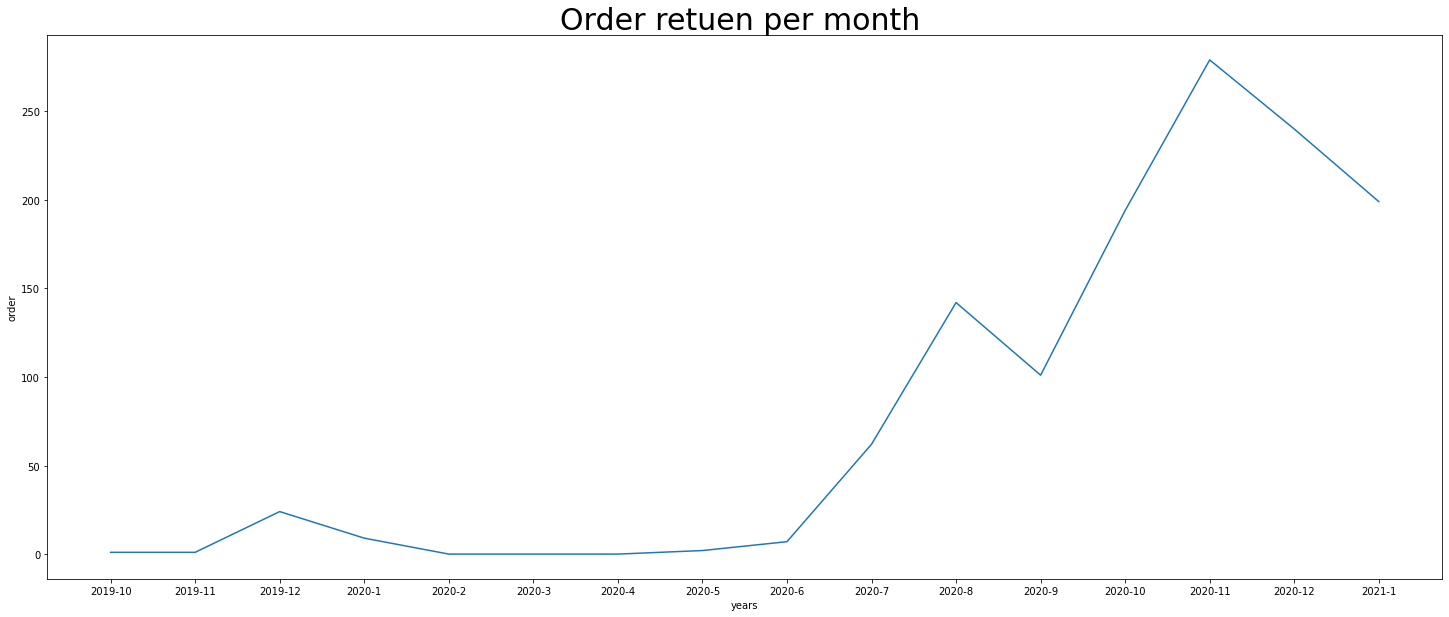

In [417]:
plt.figure(figsize = (25, 10))
d = {'years': dd.keys(), 'order' : dd.values()}
pd.DataFrame(data=d)

sns.lineplot(data=pd.DataFrame(data=d), x="years", y="order")
plt.title('Order retuen per month ', fontsize = 30)
plt.show()

In [420]:
dd = {"2019-10":0,"2019-11":0,"2019-12":0,"2020-1":0,"2020-2":0,"2020-3":0,"2020-4":0,"2020-5":0,"2020-6":0,"2020-7":0,"2020-8":0,"2020-9":0,"2020-10":0,"2020-11":0,"2020-12":0,"2021-1":0}

completedDF = df[df['Order Status']=='Completed']
for name, group in completedDF['Order Date'].groupby([pd.DatetimeIndex(completedDF['Order Date']).year,
                                                      pd.DatetimeIndex(completedDF['Order Date']).month]):
    dd[str(name).replace(', ','-').replace('(','').replace(')','')] = len(group)
print(dd)

{'2019-10': 8, '2019-11': 28, '2019-12': 390, '2020-1': 725, '2020-2': 59, '2020-3': 82, '2020-4': 152, '2020-5': 1488, '2020-6': 1114, '2020-7': 1240, '2020-8': 2292, '2020-9': 1431, '2020-10': 1887, '2020-11': 2428, '2020-12': 2150, '2021-1': 2421}


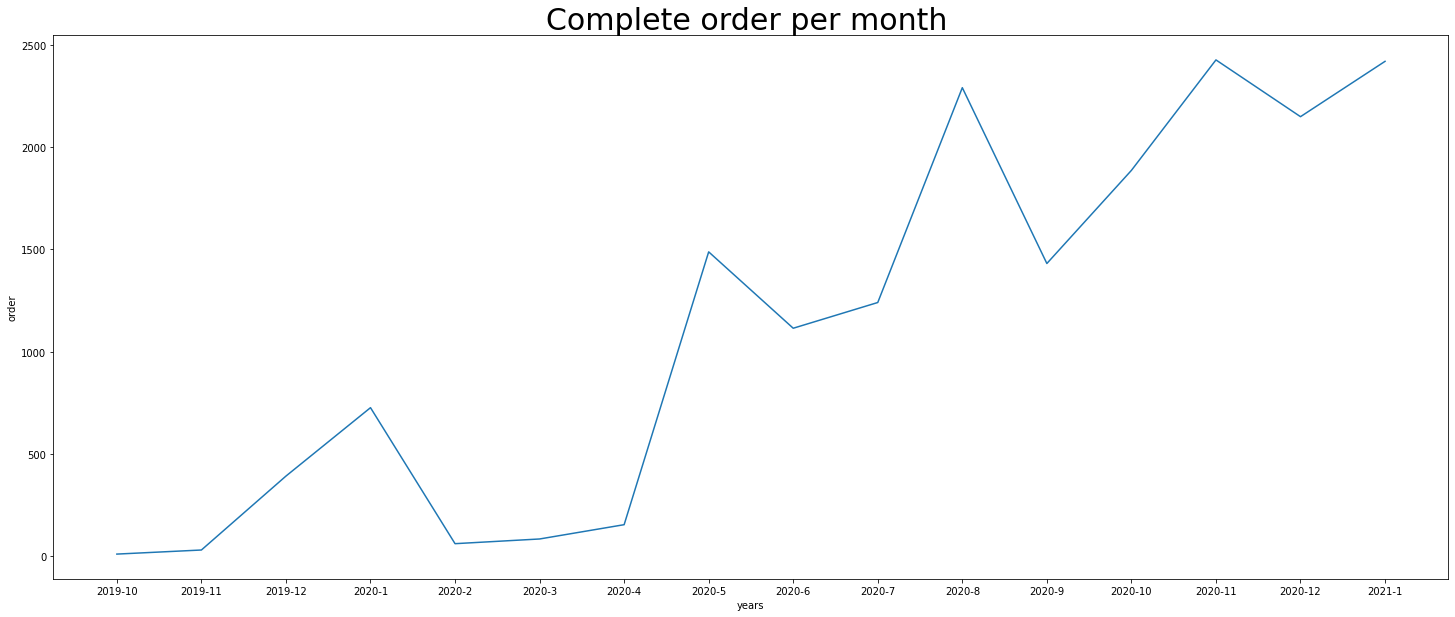

In [421]:
plt.figure(figsize = (25, 10))
d = {'years': dd.keys(), 'order' : dd.values()}
pd.DataFrame(data=d)

sns.lineplot(data=pd.DataFrame(data=d), x="years", y="order")
plt.title('Complete order per month ', fontsize = 30)
plt.show()

In [267]:
# Find a correlation between city and order status
dd={}

for name, group in returnedDF.groupby(['city']):
    #print(name, "\t", len(group))
    dd[name] = len(group)
sorted(dd)
dd = {k: v for k, v in sorted(dd.items(),reverse=True, key=lambda item: item[1])} 
dd = {k: v for k, v in dd.items() if v > 9} 
dd

{'NO CHANGE': 250,
 'karachi': 132,
 'lahore': 93,
 'islamabad': 43,
 'rawalpindi': 39,
 'peshawar': 38,
 'multan': 30,
 'faisalabad': 26,
 'hyderabad': 26,
 'gujranwala': 17,
 'khan': 17,
 'quetta': 16,
 'sialkot': 15,
 'bahawalpur': 14,
 'layyah': 12,
 'haripur': 10,
 'vehari': 10}

In [422]:
# Find a correlation between city and order status
dd={}

for name, group in completedDF.groupby(['city']):
    #print(name, "\t", len(group))
    dd[name] = len(group)
sorted(dd)
dd = {k: v for k, v in sorted(dd.items(),reverse=True, key=lambda item: item[1])} 
dd = {k: v for k, v in dd.items() if v > 100} 
dd

{'karachi': 2774,
 'lahore': 2203,
 'NO CHANGE': 1570,
 'islamabad': 944,
 'rawalpindi': 726,
 'faisalabad': 542,
 'peshawar': 512,
 'multan': 451,
 'gujranwala': 297,
 'hyderabad': 257,
 'sialkot': 255,
 'quetta': 248,
 'bahawalpur': 190,
 'sargodha': 158,
 'rahim yar khan': 145,
 'sahiwal': 127,
 'gujrat': 113,
 'sheikhupura': 106,
 'abbottabad': 104,
 'okara': 104,
 'haripur': 102}

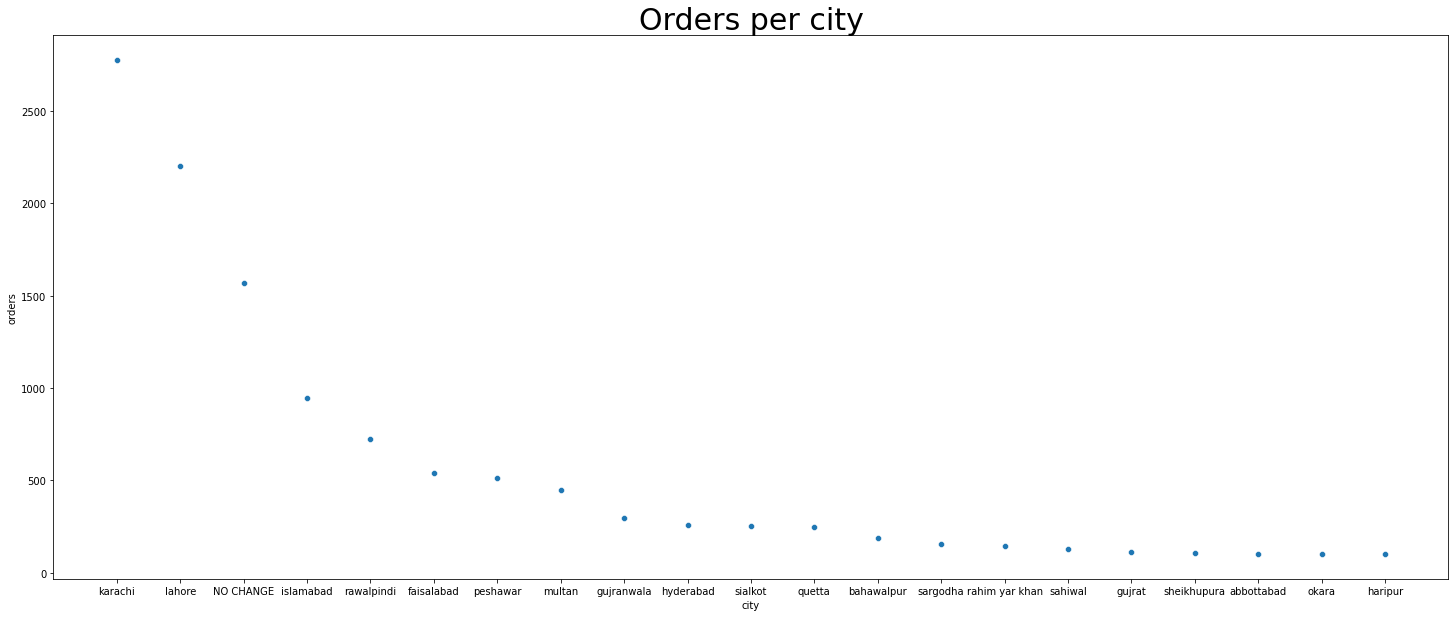

In [426]:
plt.figure(figsize = (25, 10))
d = {'city': dd.keys(), 'orders' : dd.values()}
pd.DataFrame(data=d)

sns.scatterplot(data=pd.DataFrame(data=d), x="city", y="orders")
plt.title('Orders per city', fontsize = 30)
plt.show()

In [310]:
# Can we predict number of orders, or book names in advance?
top_20_books = ['انٹرنیٹ سے پیسہ کمائیں',
 'Python Programming',
 'Artificial Intelligence',
 'Blockchain',
 'Cryptocurrency And Bitcoin',
 'Product Management',
 'Justju ka safar-1',
 'ڈیٹا سائنس',
 'مشین لرننگ',
 'Sukkur To Florida',
 '(C++)',
 'R ka Taaruf',
 'Introduction to Blockchain with Case Studies',
 'Molo Masali',
 'ڈیٹا سائنس ۔ ایک تعارف',
 'Lucky Draw - Free Book',
 'Kaggle for Begginers',
 'ایک تھا الگورتھم',
 'Column Nigari Kese Sekhain',
 'Linux - An Introduction']

top_20_books[1:10]

['Python Programming',
 'Artificial Intelligence',
 'Blockchain',
 'Cryptocurrency And Bitcoin',
 'Product Management',
 'Justju ka safar-1',
 'ڈیٹا سائنس',
 'مشین لرننگ',
 'Sukkur To Florida']

In [311]:
# Find any hidden patterns that are counter-intuitive for a layman
# more than 50% orders are from top 20 Books --
top_20_books_orders_df = df[df['Book Name'].isin(top_20_books)]
top_20_books_orders_df

,Order Number,Order Status,Book Name,Order Date,City (Billing),city
0,70978,Completed,Column Nigari Kese Sekhain,2021-01-20 17:43:00,swat,swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 13:37:00,karachi,karachi
3,70959,Completed,R ka Taaruf,2021-01-20 10:32:00,karachi,karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,2021-01-20 10:29:00,karachi,karachi
7,70955,Completed,Kaggle for Begginers,2021-01-20 08:05:00,bahawalpur,bahawalpur
...,...,...,...,...,...,...
19157,3669,Completed,Introduction to Blockchain with Case Studies,2019-11-21 13:00:00,rawalpindi,rawalpindi
19168,3317,Completed,Kaggle for Begginers,2019-11-15 01:32:00,islamabad,islamabad
19170,3307,Completed,Kaggle for Begginers,2019-11-14 22:17:00,karachi,karachi
19183,310,Returned,Kaggle for Begginers,2019-10-03 16:42:00,rawalpindi,rawalpindi


In [312]:
# Find any hidden patterns that are counter-intuitive for a layman
# more than 25% orders are from top 10 Books --
top_10_books_orders_df = df[df['Book Name'].isin(top_ten_books[1:10])]
top_10_books_orders_df

,Order Number,Order Status,Book Name,Order Date,City (Billing),city
10,70952,Completed,Sukkur To Florida,2021-01-19 23:39:00,karachi,karachi
13,70946,Completed,Python Programming,2021-01-19 20:55:00,mirpur,mirpur
18,70938,Completed,ڈیٹا سائنس,2021-01-19 15:05:00,peshawar,peshawar
35,70908,Completed,Artificial Intelligence,2021-01-18 21:19:00,multan,multan
36,70907,Completed,Python Programming,2021-01-18 21:15:00,multan,multan
...,...,...,...,...,...,...
17827,27344,Completed,Justju ka safar-1,2020-04-26 23:52:00,sibi,sibi
17830,27332,Completed,Justju ka safar-1,2020-04-26 20:52:00,faisalabad,faisalabad
17831,27330,Completed,Justju ka safar-1,2020-04-26 20:39:00,vehari,vehari
17832,27326,Completed,Justju ka safar-1,2020-04-26 20:14:00,dera ismail khan khyber pakhtunkhwa,dera


In [434]:
x = ["2019-10","2019-11","2019-12","2020-1","2020-2","2020-3","2020-4","2020-5","2020-6","2020-7","2020-8","2020-9","2020-10","2020-11","2020-12","2021-1"]
y = {"2019-10":0,"2019-11":0,"2019-12":0,"2020-1":0,"2020-2":0,"2020-3":0,"2020-4":0,"2020-5":0,"2020-6":0,"2020-7":0,"2020-8":0,"2020-9":0,"2020-10":0,"2020-11":0,"2020-12":0,"2021-1":0}
z = {"2019-10":0,"2019-11":0,"2019-12":0,"2020-1":0,"2020-2":0,"2020-3":0,"2020-4":0,"2020-5":0,"2020-6":0,"2020-7":0,"2020-8":0,"2020-9":0,"2020-10":0,"2020-11":0,"2020-12":0,"2021-1":0}

In [435]:
#Can we predict number of orders, or book names in advance?

dic_list = []
for i in range(1,16):

    book_df = df[df['Book Name']== top_20_books[i]]
    y = z
    for name, group in book_df['Order Date'].groupby([pd.DatetimeIndex(book_df['Order Date']).year,
                                                      pd.DatetimeIndex(book_df['Order Date']).month]):
        y[str(name).replace(', ','-').replace('(','').replace(')','')] = len(group)
    dic_list.append(y.copy())
print(len(dic_list))

15


انٹرنیٹ سے پیسہ کمائیں
Python Programming
Artificial Intelligence
Blockchain
Cryptocurrency And Bitcoin
Product Management
Justju ka safar-1
ڈیٹا سائنس
مشین لرننگ
Sukkur To Florida
(C++)
R ka Taaruf
Introduction to Blockchain with Case Studies
Molo Masali
ڈیٹا سائنس ۔ ایک تعارف


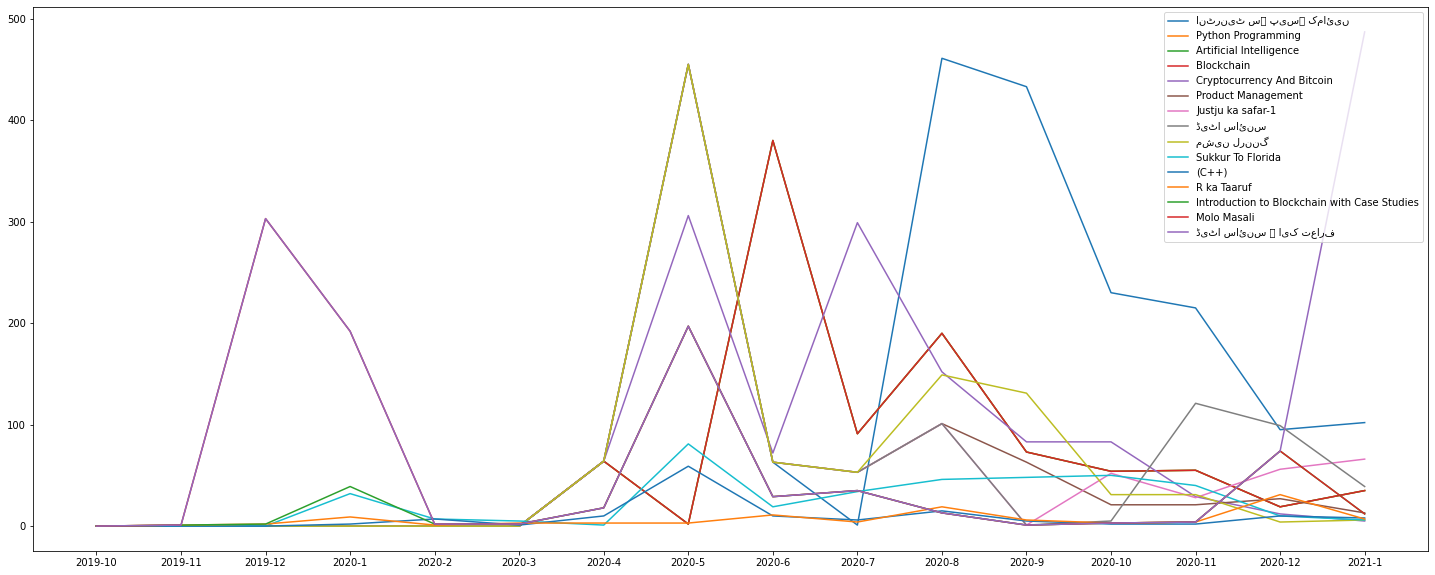

In [383]:
fig, ax = plt.subplots(figsize = (25, 10))

for index,l in enumerate(dic_list):
    print(top_20_books[index])
    ax.plot(x, l.values(),label=top_20_books[index])
    
plt.legend(loc='best')
plt.show()

In [458]:
books_df = pd.DataFrame(columns=['year-month','book','sale_count'])
count = 0
for index,l in enumerate(dic_list):
    print(top_20_books[index])
    #d = {'year-month': x, 'book' : top_20_books[index], 'sale_count': y.values()}
    for k,v in l.items():
        books_df = books_df.append({'year-month': k, 'book' : top_20_books[index], 'sale_count': v}, ignore_index=True)
    count +=1
    if(count==12):
        break

انٹرنیٹ سے پیسہ کمائیں
Python Programming
Artificial Intelligence
Blockchain
Cryptocurrency And Bitcoin
Product Management
Justju ka safar-1
ڈیٹا سائنس
مشین لرننگ
Sukkur To Florida
(C++)
R ka Taaruf


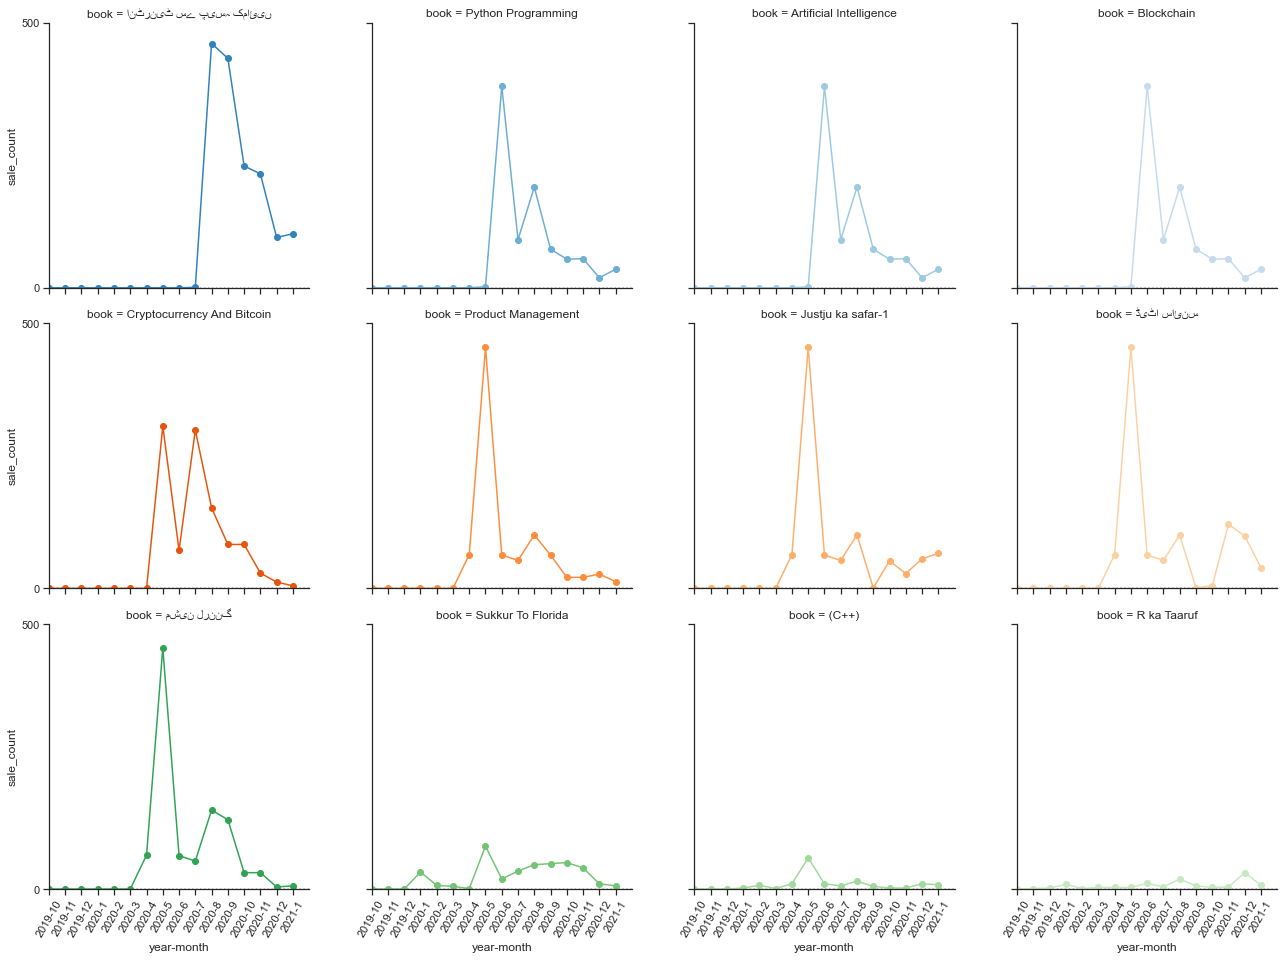

In [502]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

a4_dims = (11.7, 8.27)

grid = sns.FacetGrid(books_df, col="book", hue="book", palette="tab20c",
                     col_wrap=4, height=4.5)

grid.map(plt.axhline, y=0, ls=":", c=".7")
grid.map(plt.plot, "year-month", "sale_count", marker="o")

grid.set(xticks=np.arange(16), yticks=[0, 500],
         xlim=(0, 16), ylim=(0, 500))

grid.set_xticklabels(rotation=60)

grid.fig.tight_layout(w_pad=4)